In [1]:
import pandas as pd
import os
import re
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Create initial datasets

### Setup input/output

In [3]:
# set base directory
baseDIR = os.path.dirname(os.getcwd())

# set input directory
inDIR = 'data/'

# set output directory
outDIR = 'data/clip'
if not os.path.exists(os.path.join(baseDIR, outDIR)):
    os.mkdir(os.path.join(baseDIR, outDIR))

# set input file for biomass and associated data
inXLSX = 'PrairieDogPostPlagueBiomassProject_5april2022epAFTERNOON.xlsx'
# NOTE: data originally stored in: T:\2-Projects\Thunder Basin\PDog Biomass\DataEntry\Multiyear

# set input file for 2021 'A' transects
pdog_a_trnx = 'T:/3-GIS/ThunderBasin/Pdog_Vegetation/A_transects_start-end_2021.shp'

# set input file for 2021 'Roth' transects
pdog_roth_pts = 'T:/3-GIS/ThunderBasin/Bird_Habitats_Project/BMZ/finalbmz_2021.shp'

# set size of clipping quadrat for calculating biomass density
quad_size_m2 = 0.5

### Load data

In [4]:
# create an Excel file object for investigating contents
pdog_xlsx = pd.ExcelFile(os.path.join(baseDIR, inDIR, inXLSX))

# create a GeoDataFrame of 'A' transect data
gdf_a_trnx = gpd.read_file(pdog_a_trnx)

# create a GeoDataFrame of 'Roth' transect data
gdf_roth_pts = gpd.read_file(pdog_roth_pts)

# display the sheet names in the .xlsx file
display(pdog_xlsx.sheet_names)

['MetaData',
 'Soils_and_Env_Covariates',
 'Biomass',
 'PrairieDogBurrows',
 'ShrubMeasurements',
 'SpeciesRichness']

In [5]:
# load necessary data
df_pdog_bm = pdog_xlsx.parse(sheet_name='Biomass', header=0)
df_pdog_sr = pdog_xlsx.parse(sheet_name='SpeciesRichness', header=0)
df_pdog_env = pdog_xlsx.parse(sheet_name='Soils_and_Env_Covariates', header=0)

In [6]:
df_pdog_sr['Point'].unique()

array(['1nw01', '2duchardtE24', 'C1.2', 'C1.6', 'C10.1', 'C10.6', 'C2.1',
       'C2.7', 'C4.4', 'C4.8', 'C6.7', 'C7.2', 'C7.7', 'C9.1', 'C9.6',
       'E10.3', 'E10.6', 'E10.7', 'E18.2', 'E18.4', 'E18.8', 'E20.2',
       'E20.4', 'E20.7', 'E21.2', 'E21.6', 'E21.8', 'E22.2', 'E22.6',
       'E22.8', 'E23.2', 'E23.4', 'E23.8', 'E26.1', 'E26.3', 'E26.5',
       'E30.1', 'E30.3', 'E33.3', 'E33.5', 'E33.8', 'E35.1', 'E35.3',
       'E39.1', 'E39.4', 'E39.6', 'E46.2', 'E46.5', 'E46.7', 'E49.1',
       'E49.3', 'E49.6', 'E51.1', 'E51.3', 'E51.4', 'E52.1', 'E52.2',
       'E52.4', 'E55.1', 'E55.2', 'E55.5', 'E57.1', 'E57.2', 'E57.5',
       'E60.2', 'E60.5', 'E7.2', 'E7.4', 'E7.5', 'E8.1', 'E8.2', 'E8.6',
       'E9.1', 'E9.2', 'E9.4', 'L11.3', 'L11.7', 'L3.3', 'L3.8', 'L4.2',
       'L4.6', 'L4.8', 'L5.2', 'L5.7', 'L6.6', 'L7.1', 'L7.6', 'L8.3',
       'L8.8', 'SAU01', 'L8.6', 'A3.1', 'A1.1', 'Roth 143_C', 'A2.1'],
      dtype=object)

In [7]:
df_pdog_bm['Point'].unique()

array(['1nw01', '2duchardtE24', 'C1.2', 'C1.6', 'C10.1', 'C10.6', 'C2.1',
       'C2.7', 'C4.4', 'C4.8', 'C6.7', 'C7.2', 'C7.7', 'C9.1', 'C9.6',
       'E10.3', 'E10.6', 'E10.7', 'E18.2', 'E18.4', 'E18.8', 'E20.2',
       'E20.4', 'E20.7', 'E21.2', 'E21.6', 'E21.8', 'E22.2', 'E22.6',
       'E22.8', 'E23.2', 'E23.4', 'E23.8', 'E26.1', 'E26.3', 'E26.5',
       'E30.1', 'E30.3', 'E33.3', 'E33.5', 'E33.8', 'E35.1', 'E35.3',
       'E39.1', 'E39.4', 'E39.6', 'E46.2', 'E46.5', 'E46.7', 'E49.1',
       'E49.3', 'E49.6', 'E51.1', 'E51.3', 'E51.4', 'E52.1', 'E52.2',
       'E52.4', 'E55.1', 'E55.2', 'E55.5', 'E57.1', 'E57.2', 'E57.5',
       'E60.2', 'E60.5', 'E7.2', 'E7.4', 'E7.5', 'E8.1', 'E8.2', 'E8.6',
       'E9.1', 'E9.2', 'E9.4', 'L11.3', 'L11.7', 'L3.3', 'L3.8', 'L4.2',
       'L4.6', 'L4.8', 'L5.2', 'L5.7', 'L6.6', 'L7.1', 'L7.6', 'L8.3',
       'L8.8', 'sau01', 'Trashgrass', 'A1.1', 'A2.1', 'A3.1', 'C4.5',
       'E30.6', 'E30_C', 'E30_P', 'E36.3', 'E37.2', 'L8.6', 'Roth101_c',
     

In [8]:
df_pdog_sr['Point'][~df_pdog_sr['Point'].isin(df_pdog_bm['Point'].unique())].unique()

array(['SAU01', 'Roth 143_C'], dtype=object)

In [9]:
df_pdog_bm['Point'][~df_pdog_bm['Point'].isin(df_pdog_sr['Point'].unique())].unique()

array(['sau01', 'Trashgrass', 'C4.5', 'E30.6', 'E30_C', 'E30_P', 'E36.3',
       'E37.2', 'Roth101_c', 'Roth101_O', 'Roth101_p', 'Roth114_c',
       'Roth114_O', 'Roth114_p', 'Roth143_c', 'Roth143_O', 'Roth143_p'],
      dtype=object)

In [10]:
# rename points in clipping and cover datasets to match
df_pdog_sr.loc[df_pdog_sr['Point'] == 'SAU01', 'Point'] = 'sau01'
df_pdog_sr.loc[df_pdog_sr['Point'] == 'Roth 143_C', 'Point'] = 'Roth143_c'

In [11]:
# rename date column in clipping dataset
df_pdog_bm = df_pdog_bm.rename(columns={'Sample Date': 'Date'})

# set dates in cover data
df_pdog_sr = df_pdog_sr[df_pdog_sr['Date'] != 'na']
df_pdog_sr['Date'] = pd.to_datetime(df_pdog_sr['Date'])

In [12]:
# calculate total biomass density in g/m^2 by summing SD and live and adjusting for quadrat size
df_pdog_bm['Total_Weight_(g/m^2)'] = df_pdog_bm[['TotalCurrentYear',
                                                 'SD total']].sum(axis=1) / quad_size_m2

In [13]:
# aggregate clipping data
df_pdog_bm_agg = df_pdog_bm.groupby(['Date', 'Point']).mean().reset_index()

# aggregate cover data
df_pdog_sr_agg = df_pdog_sr.groupby(['Date', 'Point']).mean().reset_index()

In [16]:
df_pdog_fnl = pd.merge_asof(df_pdog_bm_agg.sort_values('Date'),
                         df_pdog_sr_agg.sort_values('Date'),
                         left_on= 'Date',
                         right_on= 'Date',
                         by=['Point'],
                         direction= 'nearest',
                         tolerance= datetime.timedelta(days= 22),
                         suffixes=['_bm', '_sr'])

In [18]:
bad_plots = df_pdog_fnl.groupby('Point').mean()[((df_pdog_fnl.groupby('Point').mean()['%Shrub Cover'] +
                                                  df_pdog_fnl.groupby('Point').mean()['% YUGL cover']) >= 20)]

In [19]:
df_pdog_fnl['Cacti_cladodes'] = df_pdog_fnl['Cacti_cladodes'].transform(lambda x: 0.0 if np.isnan(x) else x)
df_pdog_fnl['%Shrub Cover'] = df_pdog_fnl['%Shrub Cover'].transform(lambda x: 0.0 if np.isnan(x) else x)

In [20]:
#df_pdog_fnl

In [21]:
df_pdog_fnl = df_pdog_fnl[(df_pdog_fnl['Cacti_cladodes'] < 50) &
                          ((df_pdog_fnl['%Shrub Cover'] +
                            df_pdog_fnl['% YUGL cover']) < 20) &
                          (~df_pdog_fnl['Point'].isin(bad_plots.index))]

<AxesSubplot:xlabel='Year', ylabel='Total_Weight_(g/m^2)'>

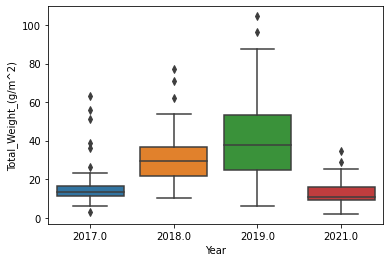

In [25]:
sns.boxplot(x='Year', y='Total_Weight_(g/m^2)', data=df_pdog_fnl)

In [26]:
df_pdog_fnl['Point'][~df_pdog_fnl['Point'].isin(df_pdog_env['Point'].unique())].unique()

array(['sau01', 'A1.1', 'A2.1', 'A3.1', 'Roth143_c'], dtype=object)

In [27]:
df_pdog_env['Point'][~df_pdog_env['Point'].isin(df_pdog_fnl['Point'].unique())].unique()

array(['E26.5', 'SAU01'], dtype=object)

In [28]:
df_pdog_env

,Point,Transect,Easting_BirdPt,Northing_BirdPt,Mean.GPS_E.Biomass,Mean.GPS_N.Biomass,Texture_Sample,Texture_Run,Percent.Sand,Percent.Clay,...,tmin_celsius_annual,SSURGO_ave_clay_10cm,SSURGO_ave_clay_30cm,SSURGO_ave_clay_200cm,SSURGO_ave_sand_10cm,SSURGO_ave_sand_30cm,SSURGO_ave_sand_200cm,SSURGO_ave_silt_10cm,SSURGO_ave_silt_30cm,SSURGO_ave_silt_200cm
0,E26.3,E26,499428.0,4813456.0,499413.315,4813462.255,42,7,37.856,31.216,...,0.25,31.000000,31.000000,31.000000,35.000000,35.000000,35.000000,34.000000,34.000000,34.000000
1,E60.5,E60,489036.0,4798019.0,489045.615,4798033.190,73,5,60.000,15.288,...,0.16,16.548760,27.581364,31.387190,64.192149,45.612087,36.761715,19.259091,26.806550,31.851095
2,C4.4,C4,494388.0,4811280.0,494402.705,4811289.075,5,1,65.856,18.216,...,0.27,25.080232,27.857371,28.311977,47.641013,38.913134,36.690408,27.278755,33.229495,34.997615
3,E33.8,E33,495094.0,4811608.0,495080.140,4811620.305,48,3,60.784,20.360,...,0.25,18.066920,26.680684,21.949900,69.598481,56.954694,60.971134,12.334599,16.364623,17.078965
4,C9.6,C9,498802.0,4816553.0,498815.400,4816563.830,11,1,63.784,10.360,...,0.19,23.500000,45.000000,35.000000,39.200000,26.100000,35.400000,37.300000,28.900000,29.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,E7.2,E7,499204.0,4825203.0,499217.330,4825202.565,14,1,39.784,32.288,...,-0.03,21.512524,34.530219,28.668168,36.648652,28.746391,34.193383,41.838825,36.723389,37.138448
87,E52.2,E52,487882.0,4803198.0,487894.550,4803210.470,64,4,55.856,24.144,...,0.29,21.530601,45.000000,42.180986,55.064467,20.000000,33.900653,23.404932,35.000000,23.918360
88,E30.1,E30,492149.0,4815905.0,492161.655,4815918.655,44,3,74.712,6.288,...,0.11,20.000000,38.000000,36.500000,42.100000,35.500000,32.500000,37.900000,26.500000,31.000000
89,L11.3,L11,478619.0,4807083.0,478629.825,4807094.790,86,6,57.640,10.216,...,0.25,21.800000,19.900000,15.000000,40.700000,52.500000,76.000000,37.500000,27.600000,9.000000


In [29]:
# rename points in clipping and cover datasets to match
df_pdog_env.loc[df_pdog_env['Point'] == 'SAU01', 'Point'] = 'sau01'

In [35]:
# drop any duplicated (manually identified that they exist)
df_pdog_env = df_pdog_env.drop_duplicates(keep='first')

In [36]:
# convert 'a' transect data to get center point
gdf_a_trnx['Point'] = gdf_a_trnx['Tranect'].transform(lambda x: x.split(' ')[0])

gdf_a_trnx_mean = gdf_a_trnx.groupby('Point').mean().rename(columns={'UTME': 'Mean.GPS_E.Biomass',
                                                                'UTMN': 'Mean.GPS_N.Biomass'}).reset_index()

# convert 'Roth' point data
gdf_roth_pts['Point'] = gdf_roth_pts['Name']
gdf_roth_pts.loc[gdf_roth_pts['Point'] == 'Roth143_C', 'Point'] = 'Roth143_c'

gdf_roth_pts['Mean.GPS_E.Biomass'] = gdf_roth_pts.geometry.x
gdf_roth_pts['Mean.GPS_N.Biomass'] = gdf_roth_pts.geometry.y


In [37]:
# combine biomass and environmental datasets
df_pdog_fnl = pd.merge(df_pdog_fnl,
                       pd.concat([df_pdog_env[['Point', 'Mean.GPS_E.Biomass', 'Mean.GPS_N.Biomass']],
                                 gdf_a_trnx_mean,
                                 gdf_roth_pts[['Point', 'Mean.GPS_E.Biomass', 'Mean.GPS_N.Biomass']]]),
                       on='Point',
                       how='left')

In [40]:
df_pdog_fnl.to_csv(os.path.join(baseDIR, outDIR, 'TB_pdog_clip.csv'), index=False)

# Questions
* ID's missing from GPS (see above) - can get A. and Roth from shapefile(s) on T:
    * (A are in ThunderBasin/PdogVegetation; Roth are in BMZ file in ThunderBasin/BirdHabitatsProject/BMZ)